# Exploración

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer,MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

from dateutil import parser

In [126]:
datos_enfermedad = pd.read_csv("data/Datos Lab 1.csv")

In [127]:
data = datos_enfermedad.copy()

In [128]:
data.head(20)

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.000,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.000,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.000,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.000,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.000,52.700,1.850,15.400,107.700,107/61,105.0,...,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
6,DHdn8968,22 May 25,F,31.000,87.000,1.660,31.600,91.500,139/81,207.0,...,Low,Y,166.000,0.551,139.0,81.0,Hypertension Stage 1,121.0,17.410,HIGH
7,vkQL9700,"October 26, 2023",M,69.000,59.684,1.940,23.914,117.986,106/115,206.0,...,High,Y,193.981,0.608,106.0,115.0,Hypertension Stage 2,134.0,16.203,HIGH
8,bUBT9994,15/12/2023,F,89.162,85.600,1.660,31.100,83.600,103/99,222.0,...,High,N,166.000,0.504,103.0,99.0,Hypertension Stage 2,126.0,NaN,HIGH
9,nktq6689,"January 16, 2022",F,57.000,100.130,1.840,22.242,80.814,165/99,123.0,...,Low,N,183.988,0.439,165.0,99.0,Hypertension Stage 2,39.0,15.158,LOW


In [129]:
display(data.sample(20))

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
271,FIdx2817,18 Mar 20,M,54.0,52.900,1.700,18.300,136.336,139/66,170.0,...,High,Y,170.000,0.433,139.0,66.0,Hypertension Stage 1,99.0,14.010,INTERMEDIARY
430,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.0,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
1408,Cmbg0287,"February 17, 2024",F,31.0,105.500,1.770,33.700,77.900,142/67,134.0,...,High,Y,177.000,0.440,142.0,67.0,Hypertension Stage 2,41.0,16.520,INTERMEDIARY
119,SDuy1862,22/06/2023,F,67.0,96.235,1.661,28.343,118.402,92/107,179.0,...,Moderate,N,166.091,0.713,92.0,107.0,Hypertension Stage 2,103.0,13.849,HIGH
1610,VpjT3887,2021-05-17,F,48.0,109.300,1.810,33.400,83.200,105/100,135.0,...,High,N,181.000,0.460,105.0,100.0,Hypertension Stage 2,40.0,16.630,HIGH
523,CYeS2965,26 Jul 25,M,33.0,108.700,1.860,NaN,96.900,130/95,250.0,...,Low,Y,NaN,0.521,130.0,NaN,Hypertension Stage 1,173.0,24.022,HIGH
1153,mMoS9467,"October 31, 2023",M,50.0,50.428,1.763,36.607,74.567,172/111,255.0,...,Moderate,N,176.336,0.423,172.0,111.0,Hypertension Stage 2,190.0,21.021,LOW
1499,IwMD4008,"April 03, 2025",M,40.0,71.556,1.705,38.381,73.154,125/112,246.0,...,Low,N,170.506,0.429,125.0,112.0,Hypertension Stage 2,160.0,18.846,INTERMEDIARY
1344,qWKU5710,08-07-2020,F,34.0,76.590,1.727,22.261,87.187,138/71,245.0,...,Low,N,172.655,0.505,138.0,71.0,Hypertension Stage 1,144.0,18.252,INTERMEDIARY
733,rXkH8083,04/06/2024,M,50.0,66.200,1.860,19.100,93.100,133/87,166.0,...,Low,N,186.000,0.501,133.0,87.0,Hypertension Stage 1,106.0,15.790,HIGH


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

In [131]:
dict = pd.read_excel("data/DiccPacientes.xlsx")
pd.set_option('display.max_colwidth', None)
dict

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arterial sistólica>/<Presión arterial diastólica>"""
9,Total Cholesterol (mg/dL),Float,Colesterol total


In [132]:
data.shape

(1639, 24)

In [133]:
data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


In [134]:
data.isna().sum()

Patient ID                       0
Date of Service                  0
Sex                              0
Age                             68
Weight (kg)                     73
Height (m)                      61
BMI                             53
Abdominal Circumference (cm)    61
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       68
HDL (mg/dL)                     82
Fasting Blood Sugar (mg/dL)     54
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
Height (cm)                     68
Waist-to-Height Ratio           76
Systolic BP                     61
Diastolic BP                    85
Blood Pressure Category          0
Estimated LDL (mg/dL)           57
CVD Risk Score                  29
CVD Risk Level                   0
dtype: int64

In [135]:
((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)

Diastolic BP                    0.051861
HDL (mg/dL)                     0.050031
Waist-to-Height Ratio           0.046370
Weight (kg)                     0.044539
Total Cholesterol (mg/dL)       0.041489
Age                             0.041489
Height (cm)                     0.041489
Height (m)                      0.037218
Abdominal Circumference (cm)    0.037218
Systolic BP                     0.037218
Estimated LDL (mg/dL)           0.034777
Fasting Blood Sugar (mg/dL)     0.032947
BMI                             0.032337
CVD Risk Score                  0.017694
Sex                             0.000000
Patient ID                      0.000000
Date of Service                 0.000000
Family History of CVD           0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Physical Activity Level         0.000000
Blood Pressure Category         0.000000
CVD Risk Level                  0.000000
dtype: float64

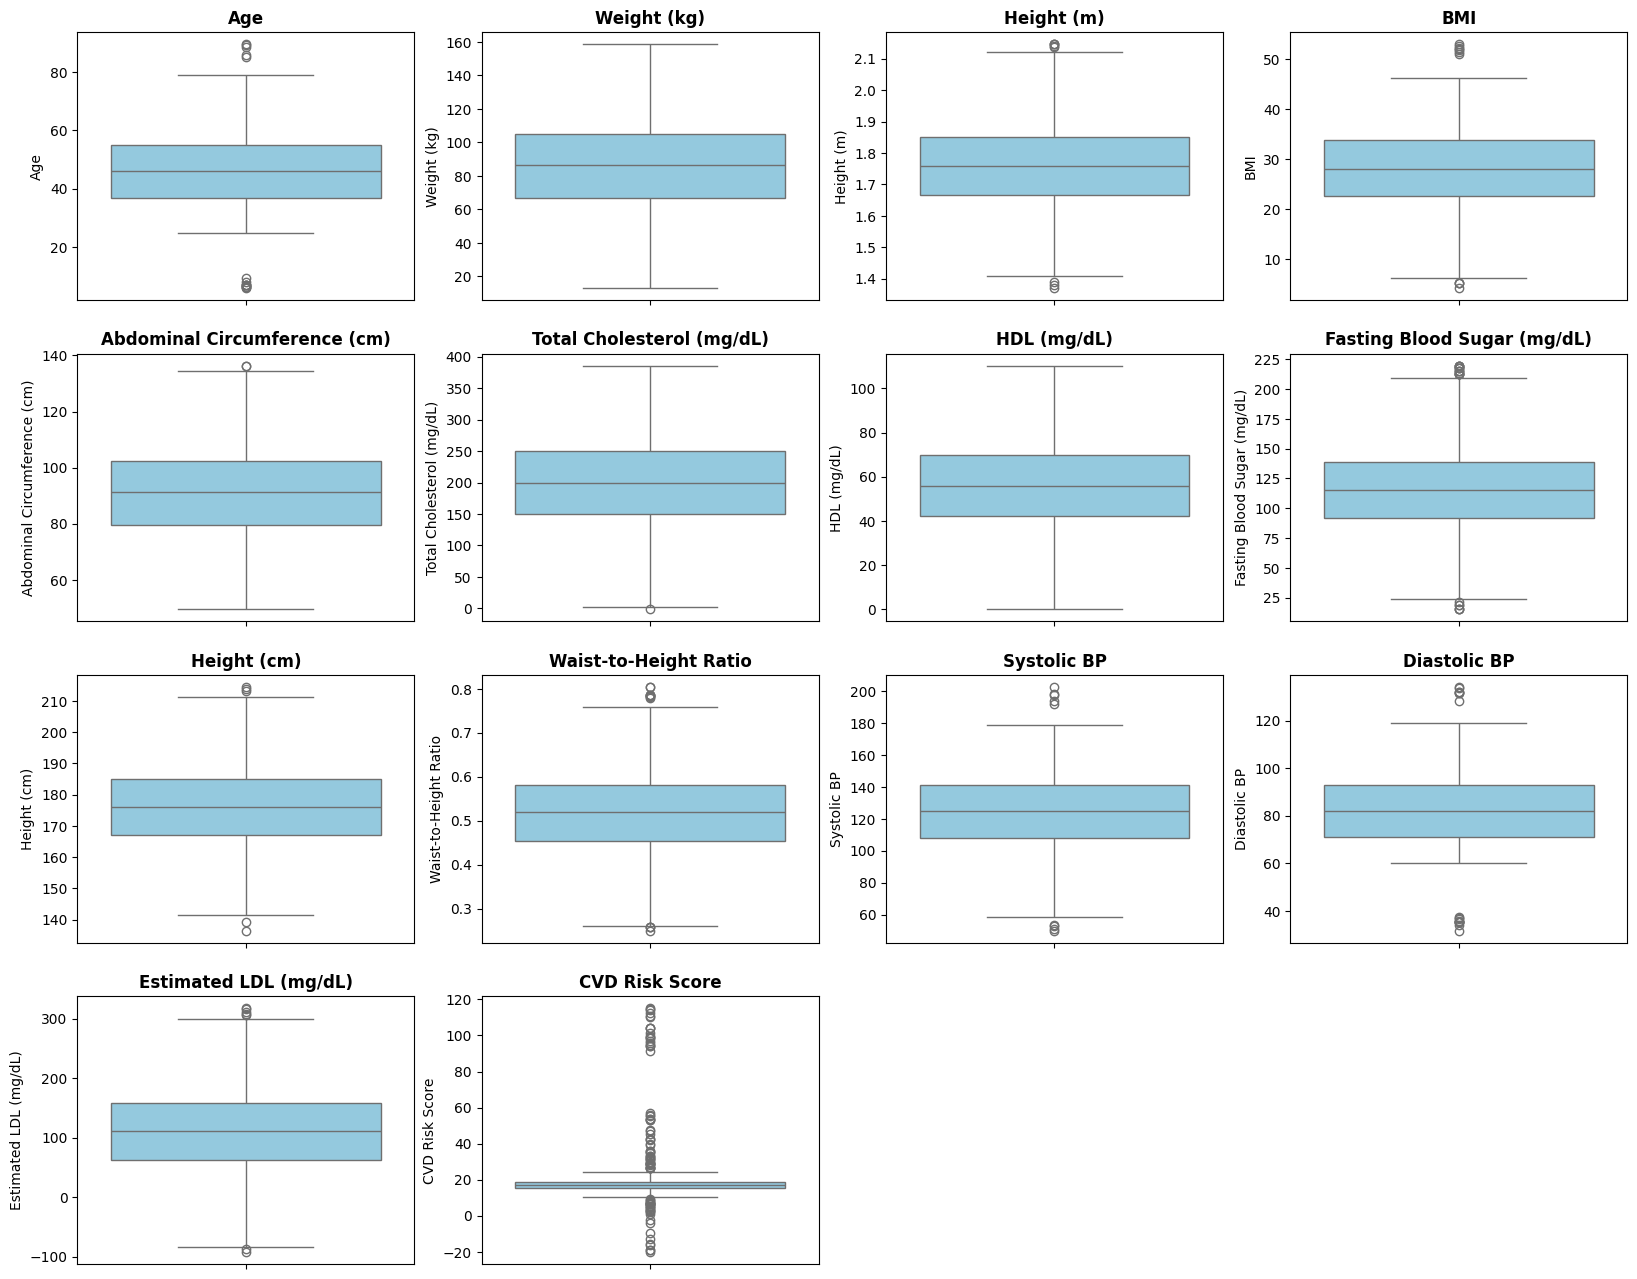

In [136]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(col, fontweight='bold')

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.show()

In [137]:
filasAlturaNaN = data[data['Height (cm)'].isna() & data['Height (m)'].isna()]
print(f"Total de filas con ambas alturas faltantes: {len(filasAlturaNaN)}")

Total de filas con ambas alturas faltantes: 3


In [138]:
filasAlturaNaN

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
306,Qbvz4402,11 Jul 20,F,55.0,115.3,NaN,32.3,85.6,113/98,192.0,...,Low,Y,NaN,0.453,113.0,98.0,Hypertension Stage 2,107.0,17.95,HIGH
684,qoOw6598,16 Apr 23,F,60.0,116.2,NaN,36.7,97.8,112/80,188.0,...,Moderate,N,NaN,0.549,112.0,80.0,Hypertension Stage 1,106.0,16.70,INTERMEDIARY
839,Ehkg3243,03-04-2023,M,32.0,111.8,NaN,41.6,95.8,95/96,199.0,...,High,N,NaN,0.584,95.0,96.0,Hypertension Stage 2,128.0,17.05,INTERMEDIARY


In [139]:
filasW_HNaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna() & data['Waist-to-Height Ratio'].isna()]
print(f"Total de filas con altura (cm), cintura faltantes y ratio faltante: {len(filasW_HNaN)}")

Total de filas con altura (cm), cintura faltantes y ratio faltante: 0


In [140]:
filasWHNaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna()]
print(f"Total de filas con altura (cm) y cintura faltantes: {len(filasWHNaN)}")

Total de filas con altura (cm) y cintura faltantes: 5


In [141]:
filasWHNaN

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
197,zZle5455,13 Apr 22,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,17.736,HIGH
537,VxVS4747,"December 05, 2025",M,50.0,62.459,1.579,20.474,NaN,177/81,181.0,...,High,Y,NaN,0.648,177.0,81.0,Hypertension Stage 1,115.0,16.565,HIGH
1170,nsli7333,"September 21, 2022",M,63.0,91.625,1.702,35.278,NaN,162/60,189.0,...,Moderate,N,NaN,0.601,162.0,60.0,Hypertension Stage 2,83.0,20.936,INTERMEDIARY
1367,zZle5455,13 Apr 22,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,17.736,HIGH
1452,zZle5455,13 Apr 22,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,19.523,HIGH


In [142]:
filasHm_NaN = data[data['Height (m)'].isna() & data['Abdominal Circumference (cm)'].isna()]
print(f"Total de filas con altura (m) y cintura faltantes: {len(filasHm_NaN)}")

Total de filas con altura (m) y cintura faltantes: 4


In [143]:
filasHW_NaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna() & data['Height (m)'].isna()]
print(f"Total de filas con altura (cm) y cintura faltantes: {len(filasHW_NaN)}")

Total de filas con altura (cm) y cintura faltantes: 0


In [144]:
filasTodoNaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna() & data['Height (m)'].isna() & data['Waist-to-Height Ratio'].isna()]
print(f"Total de filas con faltantes: {len(filasTodoNaN)}")

Total de filas con faltantes: 0


In [145]:
filasWNaN = data[ data['Abdominal Circumference (cm)'].isna() & data['Waist-to-Height Ratio'].isna()]
print(f"Total de filas con faltantes: {len(filasWNaN)}")

Total de filas con faltantes: 1


In [146]:
filasWeightNaN = data[data['Weight (kg)'].isna() & data['BMI'].isna()]
print(f"Total de filas con peso y BMI faltantes: {len(filasWeightNaN)}")

Total de filas con peso y BMI faltantes: 1


In [147]:
data["CVD Risk Level"].value_counts()

CVD Risk Level
HIGH            793
INTERMEDIARY    616
LOW             230
Name: count, dtype: int64

In [148]:
data["Blood Pressure Category"].value_counts()

Blood Pressure Category
Hypertension Stage 2    680
Hypertension Stage 1    527
Normal                  321
Elevated                111
Name: count, dtype: int64

In [149]:
data["Sex"].value_counts()

Sex
M    821
F    818
Name: count, dtype: int64

In [150]:
data["Physical Activity Level"].value_counts()

Physical Activity Level
High        582
Moderate    537
Low         520
Name: count, dtype: int64

In [151]:
data['Smoking Status'].value_counts()

Smoking Status
Y    850
N    789
Name: count, dtype: int64

In [152]:
data['Family History of CVD'].value_counts()

Family History of CVD
N    820
Y    819
Name: count, dtype: int64

In [153]:
data["Patient ID"].duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1634    False
1635    False
1636     True
1637    False
1638    False
Name: Patient ID, Length: 1639, dtype: bool

In [154]:
data.loc[
    (data['Total Cholesterol (mg/dL)'] < data['Estimated LDL (mg/dL)']) |
    (data['Total Cholesterol (mg/dL)'] < data['HDL (mg/dL)']),
    [
        'Total Cholesterol (mg/dL)',
        'Estimated LDL (mg/dL)',
        'HDL (mg/dL)'
    ]
]


,Total Cholesterol (mg/dL),Estimated LDL (mg/dL),HDL (mg/dL)
179,119.000,299.372,41.0
246,189.000,300.227,44.0
415,120.000,300.227,45.0
420,151.000,316.071,35.0
428,1.817,60.000,72.0
459,8.498,134.000,53.0
546,189.000,300.227,44.0
558,203.000,317.314,NaN
673,120.000,300.227,45.0
676,127.000,311.246,76.0


In [155]:
duplicados=data[data["Patient ID"].duplicated(keep=False)].sort_values("Patient ID")
duplicados

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
727,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH
1548,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1565,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


In [156]:
duplicados.iloc[5:80]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1544,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
846,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,...,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.0,16.872,INTERMEDIARY
305,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,...,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.0,7.050,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,JsvV0478,"November 14, 2025",F,50.0,72.800,1.790,22.700,76.800,119/81,276.0,...,Moderate,Y,179.000,0.429,119.0,81.0,Hypertension Stage 1,210.0,16.010,HIGH
276,JsvV0478,"November 14, 2025",F,50.0,72.800,1.790,22.700,76.800,119/81,276.0,...,Moderate,Y,179.000,0.429,119.0,81.0,Hypertension Stage 1,210.0,16.010,HIGH
1351,KGuE6384,11-20-2021,F,33.0,105.351,1.680,28.038,109.807,146/91,288.0,...,High,Y,167.977,0.654,146.0,91.0,Hypertension Stage 2,210.0,19.138,LOW
491,KGuE6384,11-20-2021,F,33.0,105.351,1.680,28.038,109.807,146/91,288.0,...,High,Y,167.977,0.654,146.0,91.0,Hypertension Stage 2,210.0,20.668,LOW


In [157]:
dup_counts= (data["Patient ID"].value_counts()
                            .loc[lambda x: x > 1]
                            .sort_values(ascending=False))
for id_,n in dup_counts.items():
    print(f"Patient ID: {id_} → {n} apariciones")

Patient ID: AhYt1346 → 3 apariciones
Patient ID: RlsB8509 → 3 apariciones
Patient ID: RwGu5647 → 3 apariciones
Patient ID: dJuC5084 → 3 apariciones
Patient ID: YLCe2926 → 3 apariciones
Patient ID: dSiv4949 → 3 apariciones
Patient ID: pEpZ9034 → 3 apariciones
Patient ID: STpP5810 → 3 apariciones
Patient ID: DhUJ7239 → 3 apariciones
Patient ID: gdBF9655 → 3 apariciones
Patient ID: INdI1482 → 3 apariciones
Patient ID: lqUc7918 → 3 apariciones
Patient ID: CDsa2651 → 3 apariciones
Patient ID: FTEC4446 → 3 apariciones
Patient ID: xbYu9929 → 3 apariciones
Patient ID: cUUw7860 → 3 apariciones
Patient ID: XUjh9519 → 3 apariciones
Patient ID: miQs7675 → 3 apariciones
Patient ID: fHqx3420 → 3 apariciones
Patient ID: svjU9851 → 3 apariciones
Patient ID: FnQr5343 → 3 apariciones
Patient ID: dNyM1057 → 3 apariciones
Patient ID: kajW6905 → 3 apariciones
Patient ID: DxSq2036 → 3 apariciones
Patient ID: ZDBx7052 → 3 apariciones
Patient ID: Uinq3357 → 3 apariciones
Patient ID: UIWC3599 → 3 apariciones
P

# Limpieza Inicial De Datos Modelo 1

In [158]:
dataModelo1=data.copy()

In [159]:
def convertir_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT
    try:
        return pd.to_datetime(fecha)
    except:
        try:
            return pd.Timestamp(parser.parse(str(fecha)))
        except:
            return pd.NaT

dataModelo1['Date of Service'] = dataModelo1['Date of Service'].apply(convertir_fecha)
dataModelo1

C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\4152087457.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(fecha)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-01-11,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,2021-05-21,F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,2022-12-04,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,2022-12-04,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,2025-09-06,M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


In [160]:
dataModelo1['Date of Service'].isna().sum()

np.int64(0)

In [161]:
dataModelo1[dataModelo1.duplicated(keep=False)].sort_values("Patient ID")

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
130,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1544,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1241,CDsa2651,2025-06-23,M,39.0,73.300,1.740,24.200,95.0,111/84,158.0,...,High,Y,174.000,0.546,111.0,84.0,Hypertension Stage 1,91.0,15.550,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,zcgB3048,2020-12-06,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,High,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH
956,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1548,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
799,zxhX5525,2021-11-13,M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


Revisión de el número de duplicados exactos en DataFrame para eliminar.

In [162]:
dataModelo1=dataModelo1.drop_duplicates(keep="last")
dataModelo1[dataModelo1.duplicated(keep=False)]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level


Eliminación de duplicados exactos y revisión de que esto si de realizara correctamente.

In [163]:
duplicadosModelo1=dataModelo1[dataModelo1["Patient ID"].duplicated(keep=False)].sort_values("Patient ID")
duplicadosModelo1

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
1584,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
1544,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,yAsk5000,2023-01-09,F,59.0,89.400,1.670,32.100,107.200,118/89,206.0,...,Low,Y,167.000,0.642,118.0,89.0,Hypertension Stage 1,122.0,12.137,HIGH
1452,zZle5455,2022-04-13,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,19.523,HIGH
1367,zZle5455,2022-04-13,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,17.736,HIGH
727,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH


Revison de Datos de IDs de pacientes duplicados, para revisar las fechas de toma de los datos y si entre estos hay inconsistencias en el CVD Risk Score y en el CVD Risk Level

In [164]:
indices_eliminar = []
for (pid, fecha), grupo in dataModelo1.groupby(['Patient ID', 'Date of Service']):
    if len(grupo) > 1:
        scores = grupo['CVD Risk Score'].dropna().unique()
        levels = grupo['CVD Risk Level'].dropna().unique()
        if len(scores) > 1 or len(levels) > 1:
            indices_eliminar.extend(grupo.index.tolist())

dataModelo1 = dataModelo1.drop(indices_eliminar)

dataModelo1 = dataModelo1.sort_values('Date of Service', ascending=False)
dataModelo1 = dataModelo1.drop_duplicates(subset='Patient ID', keep='first')


Se eliminaron los datos que a pesar de haber sido tomados en la misma fecha tenien valores de 'CVD Risk Score' o 'CVD Risk Level' diferentes. En caso de que no existiera esta diferencia se eliminaron los duplicados menos recientes, dejando solo un dato por paciente.

In [165]:
dataModelo1.shape

(1265, 24)

In [166]:
dataModelo1['CVD Risk Score'].isna().sum()

np.int64(28)

Revisar El número de datos que tienen el CVD Risk Score vacio (NaN) para eliminar esos datos

In [167]:
dataModelo1=dataModelo1.dropna(subset=['CVD Risk Score'])

Eliminación de datos que teinen CVD Risk Score vacio.

In [168]:
dataModelo1.shape

(1237, 24)

Revisión del tamaño de la matriz luego de esta transformacióny revisión de que se eliminaron el número de datos correcto.

In [169]:
Q1 = dataModelo1['CVD Risk Score'].quantile(0.25)
Q3 = dataModelo1['CVD Risk Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

calculo de el rango aceptado para los valores del CVD Risk Score mediante el Rango Interquartile

In [170]:
outliers = dataModelo1[(dataModelo1["CVD Risk Score"] < lower_bound) | (dataModelo1["CVD Risk Score"] > upper_bound)]
len(outliers)

28

Revisón de número de outliers que hay en la variable CVD Risk Score para eliminarlos de la tabla

In [171]:
dataModelo1 = dataModelo1[(dataModelo1["CVD Risk Score"] >= lower_bound) & (dataModelo1["CVD Risk Score"] <= upper_bound)]

Eliminación de las filas con Outliers en la variable CVD Risk Score

In [172]:
dataModelo1.shape

(1209, 24)

Revisión del tamaño de la matriz luego de esta transformacióny revisión de que se eliminaron el número de datos correcto.

# Partición de los datos Modelo 1

In [173]:
target = 'CVD Risk Score'
X_m1 = dataModelo1.drop(columns=[target, 'CVD Risk Level'])
y_m1 = dataModelo1[target]

Separación de los datos en variables independientes X y variable dependiente Y, siendo la variable dependiente Y 'CVD Risk Score'. Se elimino de el DataFrame la variable 'CVD Risk Level'

In [174]:
X_m1

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL)
1303,mpUT5152,2025-12-30,F,50.0,87.500,1.690,30.600,84.100,110/81,217.0,...,Y,N,Moderate,Y,169.000,0.498,110.0,81.0,Hypertension Stage 1,145.0
1456,GXOe4105,2025-12-29,F,79.0,106.143,1.848,37.142,82.368,100/67,NaN,...,Y,Y,Moderate,Y,184.828,0.446,100.0,67.0,Normal,127.0
863,oeeR7262,2025-12-26,M,34.0,99.400,1.700,34.400,87.400,111/84,113.0,...,Y,N,Low,N,170.000,0.514,111.0,84.0,Hypertension Stage 1,50.0
384,vIkH4078,2025-12-26,F,35.0,66.657,1.936,31.658,77.477,148/93,251.0,...,N,N,Moderate,N,193.578,0.400,148.0,93.0,Hypertension Stage 2,173.0
344,btCB8889,2025-12-25,M,42.0,110.500,1.610,42.600,96.100,132/69,114.0,...,N,N,Moderate,Y,NaN,0.597,132.0,69.0,Hypertension Stage 1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,QQcH2071,2020-01-07,F,40.0,61.800,1.870,17.700,94.300,93/63,188.0,...,N,Y,Moderate,N,187.000,0.504,93.0,63.0,Normal,81.0
581,TQAz9175,2020-01-06,M,31.0,60.300,1.700,20.900,70.100,141/96,253.0,...,Y,N,Moderate,Y,170.000,0.412,141.0,96.0,Hypertension Stage 2,185.0
614,jXfw8070,2020-01-06,F,41.0,98.170,1.964,34.151,86.303,172/68,227.0,...,Y,Y,High,N,NaN,0.439,172.0,68.0,Hypertension Stage 2,108.0
1487,OrLU6598,2020-01-05,M,32.0,65.200,1.760,21.000,72.600,141/69,147.0,...,N,N,Low,N,176.000,0.412,141.0,69.0,Hypertension Stage 2,71.0


Verificación que la separación de las variables X se realizo correctamente

In [175]:
y_m1

1303    15.960
1456    18.908
863     14.690
384     18.752
344     17.400
         ...  
472     13.950
581     16.290
614     21.970
1487    14.190
643     19.103
Name: CVD Risk Score, Length: 1209, dtype: float64

Verificación que la separación de la variable Y se realizo correctamente

In [176]:
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split( X_m1, y_m1, test_size=0.25, random_state=42)

división del conjunto de datos en entrenamiento (**train**) y prueba (**test**). con un tamaño del test del 0.25 del total de los datos y con una semilla de 42

In [177]:
X_train_m1.shape, y_train_m1.shape

((906, 22), (906,))

Tamaño del conjunto de entrenamiento

In [178]:
X_test_m1.shape, y_test_m1.shape

((303, 22), (303,))

Tamaño del conjunto de prueba

# Construcción del pipeline Modelo 1

In [179]:
cols_to_drop = ['Patient ID', 'Date of Service','Blood Pressure (mmHg)', 'Height (cm)', 'Height (m)', 'Abdominal Circumference (cm)','Weight (kg)']

def drop_columns(df):
    return df.drop(columns=cols_to_drop, errors="ignore")

dropper = FunctionTransformer(drop_columns)

Se creo la función de eliminación de columnas aunque esta es una de la ultimas acciones que se realizan en el modelo. Las columnas eliminadas fueron: 'Patient ID', 'Date of Service','Blood Pressure (mmHg)', 'Height (cm)', 'Height (m)', 'Abdominal Circumference (cm)','Weight (kg)'.

 Después de haber realizado la eliminación de duplicados, ya no se consirderaban necesarias las variables 'Patient ID' y 'Date of Service'. En cuanto a las demas variables, todas estas podian ser utilizadas para calcular algun otro valor dentro de lo tabla y despues de calcular estos valores, estas variables por si solas no se consideran tan significativas.

In [180]:
numeric_features = ['Age','BMI', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 
            'Fasting Blood Sugar (mg/dL)', 'Waist-to-Height Ratio', 'Systolic BP', 
            'Diastolic BP', 'Estimated LDL (mg/dL)'
]

categorical_features = ['Sex', 'Smoking Status', 'Physical Activity Level', 
                        'Family History of CVD', 'Blood Pressure Category'
]

Separación de las variables numericas de las categoricas

In [181]:
def height_filler(df):
    df = df.copy()
    mask_cm = df['Height (cm)'].isna() & df['Height (m)'].notna()
    df.loc[mask_cm, 'Height (cm)'] = df.loc[mask_cm, 'Height (m)'] * 100
    mask_m= df['Height (m)'].isna() & df['Height (cm)'].notna()
    df.loc[mask_m, 'Height (m)'] = df.loc[mask_m, 'Height (cm)'] / 100
    return df

llenar_altura = FunctionTransformer(height_filler)

Durante el analisis de datos se pudo ver que en su mayoria los datos que tenien faltantes en cm no los tenian en m, especificamente 1 no cumplia con est condición. por lo tanto se realiza una operación que en caso de que el Height (cm) este vacio pero el Height (m) esta lleno, se pasa el valor de Height (m) a centimetros y luego se llena el valor faltante. Esto tambien se hace al contrario.

In [182]:
def WaistHeightRatioCalculator(df):
    df = df.copy()
    mask = df['Waist-to-Height Ratio'].isna() & df['Abdominal Circumference (cm)'].notna() & df['Height (cm)'].notna()
    df.loc[mask, 'Waist-to-Height Ratio'] = df.loc[mask, 'Abdominal Circumference (cm)'] / df.loc[mask, 'Height (cm)']
    return df

calcular_WHR = FunctionTransformer(WaistHeightRatioCalculator)

Se imputan los valores faltantes de Waist-to-Height Ratio mediante la división de Abdominal Circumference (cm) sobre Height (cm), debido al analisis de datos que se realizo se sabe que solo hay un caso en el que esta acción no se puede realizar dejando 1 NaN que mas adelante se imputara solo.

In [183]:
def BloodPressureParser(df):
    df = df.copy()
    mask = df['Blood Pressure (mmHg)'].notna() & (df['Systolic BP'].isna() | df['Diastolic BP'].isna())
    bp_split = df.loc[mask, 'Blood Pressure (mmHg)'].str.split('/', expand=True)
    df.loc[mask, 'Systolic BP'] = pd.to_numeric(bp_split[0], errors='coerce')
    df.loc[mask, 'Diastolic BP'] = pd.to_numeric(bp_split[1], errors='coerce')
    return df

parsear_BP = FunctionTransformer(BloodPressureParser)

Blood Preassure es una variable que no tenia ningun faltante pero debido a su forma se considero que no era el mejor para utilizar en el analisis, por lo tanto se imputaron los valores de Systolic BP y Diastolic BP mediante las separación del string.

In [184]:
def ImputarPeso(df):
    df = df.copy()
    imputer = KNNImputer(n_neighbors=5)
    cols_to_impute = ['Height (cm)', 'Abdominal Circumference (cm)', 'Waist-to-Height Ratio', 'Age', 'BMI', 'Weight (kg)']

    imputed_array = imputer.fit_transform(df[cols_to_impute])

    df_imputed = pd.DataFrame(imputed_array, columns=cols_to_impute, index=df.index)

    
    df["Weight (kg)"] = df_imputed["Weight (kg)"]
    return df

imputar_peso = FunctionTransformer(ImputarPeso)

Para imputar los valores faltantes de Weight (kg) lo que se realizo es que busco a los 5 vecinos mas cercanos a traves de las columnas 'Height (cm)', 'Abdominal Circumference (cm)', 'Waist-to-Height Ratio', 'Age', 'BMI', 'Weight (kg)' y a partir de esto se tomo el valor mas cercano. Se utilizo la funcion 'KNNImputer'

In [185]:
def LlenarBMI(df):
    df = df.copy()
    mask = df['BMI'].isna() & df['Height (m)'].notna() & df['Weight (kg)'].notna()
    df.loc[mask, 'BMI'] = df.loc[mask, 'Weight (kg)'] / (df.loc[mask, 'Height (m)'] ** 2)
    return df

llenar_BMI = FunctionTransformer(LlenarBMI)
    

Para imputar el indice de masa muscular BMI se utilizo la formula:
$$
BMI = \frac{peso\ (kg)}{altura\ (m)^2}
$$

y se tomaron los valores de 'Height (m)' y 'Weight (kg)' ya antes imputados para realizar este calculo.

In [186]:
def imputer_colesterol(df):
    df = df.copy()
    mask = (df['Total Cholesterol (mg/dL)']<100) | (df['Total Cholesterol (mg/dL)'] > 400)
    df.loc[mask, 'Total Cholesterol (mg/dL)'] = df.loc[mask, 'Total Cholesterol (mg/dL)'].clip(lower=100, upper=400)
    return df

imputar_colesterol = FunctionTransformer(imputer_colesterol)

Total Cholesterol (mg/dL) es una variable que conetenia muchos valores a tipicos y sin sentido, por lo que mediante investigación se determino que el rango de valores que podia tomar esta variable es entre 100 y 400 (mg/dL). Los valores que no cumplian con la condición del rango se redondeaban al limite mas cercano.

In [187]:
def LDL_HDL_NaN(df):
    df = df.copy()
    mask_LDL = df['Estimated LDL (mg/dL)'] > df['Total Cholesterol (mg/dL)']
    df.loc[mask_LDL, 'Estimated LDL (mg/dL)'] =np.nan

    mask_HDL = df["HDL (mg/dL)"] > df["Total Cholesterol (mg/dL)"]
    df.loc[mask_HDL, "HDL (mg/dL)"] = np.nan

    df.loc[df['Estimated LDL (mg/dL)'] < 0, 'Estimated LDL (mg/dL)'] = np.nan
    df.loc[df['HDL (mg/dL)'] < 0, 'HDL (mg/dL)'] = np.nan

    df.loc[df['HDL (mg/dL)'] < 10, 'HDL (mg/dL)'] = np.nan
    df.loc[df['Estimated LDL (mg/dL)'] < 20, 'Estimated LDL (mg/dL)'] = np.nan

    df.loc[df['HDL (mg/dL)'] > 150, 'HDL (mg/dL)'] = np.nan
    df.loc[df['Estimated LDL (mg/dL)'] > 350, 'Estimated LDL (mg/dL)'] = np.nan

    mask_sum = (
        df['Estimated LDL (mg/dL)'].notna() &
        df['HDL (mg/dL)'].notna() &
        df['Total Cholesterol (mg/dL)'].notna() &
        (df['Estimated LDL (mg/dL)'] + df['HDL (mg/dL)'] >
         df['Total Cholesterol (mg/dL)'])
    )

    df.loc[mask_sum, ['Estimated LDL (mg/dL)', 'HDL (mg/dL)']] = np.nan

    return df

NaN_LDL_HDL = FunctionTransformer(LDL_HDL_NaN)

Mediante el analisis exploratorio se noto en las variables 'Estimated LDL (mg/dL)' y HDL (mg/dL) outliers que ese valor no deberia tomar. Medeinte investigación tambien se descubrió que los valores de esta variables no pueden ser mayores que el valor de 'Total Cholesterol (mg/dL)' y la suma de estos tampoco. Asi mismo estas variables tambien tienen ciertos rangos para ser aceptables. En el caso de 'HDL (mg/dL)' el rango es [10 150] y en el caso de 'Estimated LDL (mg/dL)' el rango es [20 350]. Los datos que no cumplen con ninguna de estas consiciones se convierten en NaN para luego imputarlos.

In [188]:
def imputer_LDL_HDL(df):
    df = df.copy()
    cols = [
        "Age",
        "BMI",
        "Systolic BP",
        "Diastolic BP",
        "Fasting Blood Sugar (mg/dL)",
        "Total Cholesterol (mg/dL)",
        "HDL (mg/dL)",
        "Estimated LDL (mg/dL)"
    ]

    imputer = KNNImputer(n_neighbors=5)
    imputed_array = imputer.fit_transform(df[cols])

    df_imputed = pd.DataFrame(imputed_array, columns=cols, index=df.index)

    df["Total Cholesterol (mg/dL)"] = df_imputed["Total Cholesterol (mg/dL)"]
    df["HDL (mg/dL)"] = df_imputed["HDL (mg/dL)"]
    df["Estimated LDL (mg/dL)"] = df_imputed["Estimated LDL (mg/dL)"]

    return df

imputar_LDL_HDL = FunctionTransformer(imputer_LDL_HDL)

Ya con los datos de inconsitentes convertidos a NaN lo que se hace es que se busca el vecino mas cercano para imputar los NaN de las columnas Total Cholesterol (mg/dL), HDL (mg/dL), Estimated LDL (mg/dL) de tal manera que los datos que se imputan sean realmente coherentes al compararlo con datos que tienen sentido.

In [189]:
def age_imputer(df):
    df = df.copy()
    df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
    df['Age'] = df['Age'].astype(int)
    return df

imputar_edad = FunctionTransformer(age_imputer)

Para los valores faltantes de edad Se emplea la mediana para imputar Age porque es robusta a outliers. Tambien se convierten estos valores a enteros ya que estos normalmente se tratan de esta forma.

In [190]:
def sugar_imputer(df):
    df = df.copy()
    col = "Fasting Blood Sugar (mg/dL)"
    df.loc[(df[col] < 40) | (df[col] > 400), col] = np.nan
    
    cols_knn = [
    "Age",
    "BMI",
    "Systolic BP",
    "Diastolic BP",
    "Total Cholesterol (mg/dL)",
    "HDL (mg/dL)",
    "Estimated LDL (mg/dL)",
    "Fasting Blood Sugar (mg/dL)"
    ]

    imputer = KNNImputer(n_neighbors=5)

    imputed = imputer.fit_transform(df[cols_knn])
    imputed_df = pd.DataFrame(imputed, columns=cols_knn, index=df.index)

    df["Fasting Blood Sugar (mg/dL)"] = imputed_df["Fasting Blood Sugar (mg/dL)"]
    return df

imputar_sugar = FunctionTransformer(sugar_imputer)

Esta función realiza una imputación en dos pasos para Fasting Blood Sugar. Primero, identifica y reemplaza valores fisiológicamente imposibles (<40 o >400 mg/dL) con NaN, considerándolos errores de medición. Segundo, imputa estos valores y cualquier NaN existente usando KNN (K=5) basándose en variables relacionadas ("Age","BMI", "Systolic BP", "Diastolic BP","Total Cholesterol (mg/dL)", "HDL (mg/dL)", "Estimated LDL (mg/dL)", "Fasting Blood Sugar (mg/dL)"). Se eligió KNN en lugar de mediana porque la glucosa tiene correlación significativa con otras variables dentro del DataFrame, de esta forma tratar de lograr una imputación mas precisa.

In [191]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])


Este pipeline imputa primero los valores faltantes restantes usando la mediana y luego escala las variables mediente normalización. Se eligió MinMaxScaler en lugar de StandardScaler porque preserva la distribución original de los datos sin asumir normalidad y todas las variables quedan en la misma escala facilitando la interpretación de coeficientes en regresión linea

In [192]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

Este pipeline imputa valores faltantes con la moda y luego aplica One-Hot Encoding para convertir categorías en variables dummy necesarias para regresión lineal. Se elimina una columna redundante en variables binarias para evitar multicolinealidad perfecta que pueda llegar a ocasionar problemas en el modelo.

In [193]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [194]:
pipeline_regresion=Pipeline(steps=[
    ("llenar_altura", llenar_altura),
    ("calcular_WHR", calcular_WHR),
    ("parsear_BP", parsear_BP),
    ("imputar_peso", imputar_peso),
    ("llenar_BMI", llenar_BMI),
    ("imputar_colesterol", imputar_colesterol),
    ("NaN_LDL_HDL", NaN_LDL_HDL),
    ("imputar_LDL_HDL", imputar_LDL_HDL),
    ("imputar_edad", imputar_edad),
    ("imputar_sugar", imputar_sugar),
    ("dropper", dropper),
    ("preprocessor", preprocessor)
])

In [195]:
from sklearn import set_config
set_config(display="diagram")

In [196]:
pipeline_regresion

,steps,"[('llenar_altura', ...), ('calcular_WHR', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function hei...001BB2F4B34C0>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [197]:
Xt_train_m1 = pipeline_regresion.fit_transform(X_train_m1)

In [198]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df_m1 = pd.DataFrame(
    Xt_train_m1.toarray() if hasattr(Xt_train_m1, "toarray") else Xt_train_m1,
    columns=feature_names,
    index=X_train_m1.index
)

In [199]:
Xt_train_df_m1


,num__Age,num__BMI,num__Total Cholesterol (mg/dL),num__HDL (mg/dL),num__Fasting Blood Sugar (mg/dL),num__Waist-to-Height Ratio,num__Systolic BP,num__Diastolic BP,num__Estimated LDL (mg/dL),cat__Sex_M,cat__Smoking Status_Y,cat__Physical Activity Level_High,cat__Physical Activity Level_Low,cat__Physical Activity Level_Moderate,cat__Family History of CVD_Y,cat__Blood Pressure Category_Elevated,cat__Blood Pressure Category_Hypertension Stage 1,cat__Blood Pressure Category_Hypertension Stage 2,cat__Blood Pressure Category_Normal
466,0.283951,0.525576,0.017502,0.016949,0.060133,0.486718,0.425964,0.276318,0.110599,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1225,0.592593,0.466529,0.360545,0.372881,0.494431,0.582324,0.340884,0.383796,0.774194,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
85,0.481481,0.569861,0.514564,0.627119,0.240534,0.566679,0.275437,0.667149,0.599078,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
803,0.246914,0.497159,0.689585,0.864407,0.514475,0.286816,0.779374,0.618295,0.764977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
776,0.308642,0.608906,0.605575,0.084746,0.293986,0.495410,0.334339,0.501045,0.866359,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.419753,0.503433,0.619577,0.000000,0.247215,0.415449,0.628847,0.413108,0.907834,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
409,0.407407,0.573552,0.066508,0.745763,0.420934,0.290293,0.622303,0.510816,0.151152,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1404,0.679012,0.614959,0.315039,0.186441,0.040089,0.300722,0.622303,0.696461,0.350230,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1005,0.444444,0.641825,0.595073,0.237288,0.220489,0.410234,0.412875,0.374025,0.811060,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Entrenamiento Modelo de Regresión Lineal Modelo 1

In [200]:
Modelo1 = LinearRegression()

In [201]:
Modelo1.fit(Xt_train_df_m1,y_train_m1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [202]:
y_train_pred_m1 = Modelo.predict(Xt_train_df_m1)

In [203]:
mae_train = mean_absolute_error(y_train_m1, y_train_pred_m1)
print("MAE  train:", mae_train)

MAE  train: 1.0481826539022276


In [204]:
mse_train_m1 = mean_squared_error(y_train_m1, y_train_pred_m1)
rmse_train = np.sqrt(mse_train_m1)
print("RMSE train:", rmse_train)

RMSE train: 1.2033099325804162


In [205]:
r2_train_m1 = r2_score(y_train_m1, y_train_pred_m1)
print("R²   train:", r2_train_m1)

R²   train: 0.7716825860755371


Con base en los resultados obtenidos sobre el conjunto de entrenamiento, el modelo de regresión lineal logró explicar aproximadamente el 77% de la variabilidad del CVD Risk Score en el conjunto de entrenamiento. En cuanto al MAE (1.05) y el RMSE (1.20) el error de la estimacion del CVD Risk Score se encuentra alrededor de 1 punto. Se puede decir que estos resultados indican que el modelo aprende patrones razonables a partir de los datos de entrenamiento.

# Estimación de la capacidad de generalización del modelo 1

In [206]:
Xt_test_m1 = pipeline_regresion.transform(X_test_m1)

In [207]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_test_df_m1 = pd.DataFrame(
    Xt_test_m1.toarray() if hasattr(Xt_test_m1, "toarray") else Xt_test_m1  ,
    columns=feature_names,
    index=X_test_m1.index
)

In [208]:
y_test_pred_m1 = Modelo1.predict(Xt_test_df_m1)

### Validación del modelo

In [209]:
mae_test = mean_absolute_error(y_test_m1, y_test_pred_m1)
print("MAE  test :", mae_test)

MAE  test : 1.038689306391068


In [210]:
mse_test = mean_squared_error(y_test_m1, y_test_pred_m1)
rmse_test = np.sqrt(mse_test)
print("RMSE test :", rmse_test)

RMSE test : 1.1123214146184435


In [211]:
r2_test = r2_score(y_test_m1, y_test_pred_m1)
print("R²   test :", r2_test)

R²   test : 0.7684775416279715


En el conjunto de prueba, el modelo demuestra una buena capacidad de generalización, ya que explica aproximadamente el 76.8% de la variabilidad del CVD Risk Score, un valor prácticamente igual al obtenido en entrenamiento. Además, el MAE (1.04) es muy similar al de entrenamiento (1.05), e el RMSE es menor (1.11), lo que indica estabilidad en las predicciones y representa que el error de estimación si se encuentra alrededor del 1. Esto sugiere que el modelo generaliza bien

### Coeficientes

In [212]:
print("Intercepto:", Modelo1.intercept_)

Intercepto: 6.728326581960962


In [213]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
feature_names = [
    name.replace("num__", "").replace("cat__", "")
    for name in feature_names
]
coef_df_m1 = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": Modelo1.coef_
})
coef_df_m1

,Variable,Coeficiente
0,Age,-0.325624
1,BMI,10.085891
2,Total Cholesterol (mg/dL),3.477550
3,HDL (mg/dL),0.339121
4,Fasting Blood Sugar (mg/dL),0.423708
5,Waist-to-Height Ratio,0.829622
6,Systolic BP,6.236802
7,Diastolic BP,-0.316402
8,Estimated LDL (mg/dL),2.022239
9,Sex_M,0.051223


## Limpieza Inicial de datos Modelo 2

In [214]:
dataModelo2=data.copy()

In [215]:
dataModelo2[dataModelo2['CVD Risk Score'].notna() & dataModelo2['CVD Risk Level'].isna()]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level


No hay filas que contengan CVD Risck Score pero no Risk Level, lo que demuestra que CVD Risk Level se deriva de Risk Score. Dada la importancia de CVD Risck Score en el contexto, se prefiere eliminar todas las entradas que no contengan esta información.

In [216]:
def convertir_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT
    try:
        return pd.to_datetime(fecha)
    except:
        try:
            return pd.Timestamp(parser.parse(str(fecha)))
        except:
            return pd.NaT

dataModelo2['Date of Service'] = dataModelo2['Date of Service'].apply(convertir_fecha)
dataModelo2

C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2537369082.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(fecha)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-01-11,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,2021-05-21,F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,2022-12-04,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,2022-12-04,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,2025-09-06,M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


In [217]:
dataModelo2['Date of Service'].isna().sum()

np.int64(0)

In [218]:
dataModelo2[dataModelo2.duplicated(keep='first')].sort_values("Patient ID")

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
1584,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.000,16.770,HIGH
1544,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.000,17.500,LOW
1566,CDsa2651,2025-06-23,M,39.0,73.300,1.740,24.200,95.0,111/84,158.0,...,High,Y,174.000,0.546,111.0,84.0,Hypertension Stage 1,91.000,15.550,INTERMEDIARY
862,CKKa5109,2023-03-18,M,51.0,85.900,1.780,27.100,87.2,144/70,189.0,...,Low,N,178.000,0.490,144.0,70.0,Hypertension Stage 2,300.227,16.400,INTERMEDIARY
1118,CYeS2965,2025-07-26,M,33.0,108.700,1.860,NaN,96.9,130/95,250.0,...,Low,Y,NaN,0.521,130.0,NaN,Hypertension Stage 1,173.000,17.780,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,2020-10-28,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,High,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.000,15.710,INTERMEDIARY
1367,zZle5455,2022-04-13,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.000,17.736,HIGH
375,zcgB3048,2020-12-06,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,High,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.000,14.834,HIGH
1548,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.000,16.850,HIGH


Se revisa si entre los duplicados restantes, si hay inconsistencia entre CVD Risk Score o CVD Risk Level.

In [219]:
indices_eliminar = []
for (pid, fecha), grupo in dataModelo2.groupby(['Patient ID', 'Date of Service']):
    if len(grupo) > 1:
        scores = grupo['CVD Risk Score'].dropna().unique()
        levels = grupo['CVD Risk Level'].dropna().unique()
        if len(scores) > 1 or len(levels) > 1:
            indices_eliminar.extend(grupo.index.tolist())

dataModelo2 = dataModelo2.drop(indices_eliminar)

dataModelo2 = dataModelo2.sort_values('Date of Service', ascending=False)
dataModelo2 = dataModelo2.drop_duplicates(subset='Patient ID', keep='first')

Se eliminaron los datos que a pesar de haber sido tomados en la misma fecha tenien valores de 'CVD Risk Score' o 'CVD Risk Level' diferentes. En caso de que no existiera esta diferencia se eliminaron los duplicados menos recientes, dejando solo un dato por paciente.

In [220]:
dataModelo2.shape

(1265, 24)

Revisión y eliminación de las filas con CVD Risk Score nulo.

In [221]:
print(dataModelo2['CVD Risk Score'].isna().sum())
dataModelo2=dataModelo2.dropna(subset=['CVD Risk Score'])

28


Revisión de los datos luego de la eliminación.

In [222]:
dataModelo2.shape

(1237, 24)

Uso del rango Interquantile para identificar los rangos aceptables del CVD Risk Score y eliminación de outliers.

In [223]:
Q1 = dataModelo2['CVD Risk Score'].quantile(0.25)
Q3 = dataModelo2['CVD Risk Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataModelo2[(dataModelo2["CVD Risk Score"] < lower_bound) | (dataModelo2["CVD Risk Score"] > upper_bound)]
len(outliers)

dataModelo2 = dataModelo2[(dataModelo2["CVD Risk Score"] >= lower_bound) & (dataModelo2["CVD Risk Score"] <= upper_bound)]

Revisión de datos luego de la eliminación.

In [224]:
dataModelo2.shape

(1209, 24)

# Partición de los datos Modelo 2

Separación de los datos en variables independientes X y variable dependiente Y, siendo la variable dependiente Y 'CVD Risk Score'. Se elimina del DataFrame la variable 'CVD Risk Level'

In [225]:
target = 'CVD Risk Score'
X_m2 = dataModelo2.drop(columns=[target, 'CVD Risk Level'])
y_m2 = dataModelo2[target]

In [226]:
X_m2

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL)
1303,mpUT5152,2025-12-30,F,50.0,87.500,1.690,30.600,84.100,110/81,217.0,...,Y,N,Moderate,Y,169.000,0.498,110.0,81.0,Hypertension Stage 1,145.0
1456,GXOe4105,2025-12-29,F,79.0,106.143,1.848,37.142,82.368,100/67,NaN,...,Y,Y,Moderate,Y,184.828,0.446,100.0,67.0,Normal,127.0
863,oeeR7262,2025-12-26,M,34.0,99.400,1.700,34.400,87.400,111/84,113.0,...,Y,N,Low,N,170.000,0.514,111.0,84.0,Hypertension Stage 1,50.0
384,vIkH4078,2025-12-26,F,35.0,66.657,1.936,31.658,77.477,148/93,251.0,...,N,N,Moderate,N,193.578,0.400,148.0,93.0,Hypertension Stage 2,173.0
344,btCB8889,2025-12-25,M,42.0,110.500,1.610,42.600,96.100,132/69,114.0,...,N,N,Moderate,Y,NaN,0.597,132.0,69.0,Hypertension Stage 1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,QQcH2071,2020-01-07,F,40.0,61.800,1.870,17.700,94.300,93/63,188.0,...,N,Y,Moderate,N,187.000,0.504,93.0,63.0,Normal,81.0
581,TQAz9175,2020-01-06,M,31.0,60.300,1.700,20.900,70.100,141/96,253.0,...,Y,N,Moderate,Y,170.000,0.412,141.0,96.0,Hypertension Stage 2,185.0
614,jXfw8070,2020-01-06,F,41.0,98.170,1.964,34.151,86.303,172/68,227.0,...,Y,Y,High,N,NaN,0.439,172.0,68.0,Hypertension Stage 2,108.0
1487,OrLU6598,2020-01-05,M,32.0,65.200,1.760,21.000,72.600,141/69,147.0,...,N,N,Low,N,176.000,0.412,141.0,69.0,Hypertension Stage 2,71.0


In [227]:
y_m2

1303    15.960
1456    18.908
863     14.690
384     18.752
344     17.400
         ...  
472     13.950
581     16.290
614     21.970
1487    14.190
643     19.103
Name: CVD Risk Score, Length: 1209, dtype: float64

Se realiza la división del conjunto de datos en entrenamiento (**train**) y prueba (**test**). con un tamaño del test del 0.25 del total de los datos y una semilla de 42.

In [228]:
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split( X_m2, y_m2, test_size=0.25, random_state=42)

Se consulta el tamaño de datos de entrenamiento y test.

In [229]:
X_train_m2.shape, y_train_m2.shape

((906, 22), (906,))

In [230]:
X_test_m2.shape, y_test_m2.shape

((303, 22), (303,))

# Construcción del pipeline Modelo 2

En primer lugar, se realiza la modificación de variables para mejorar la calidad de los datos.

A conitnuación, se usa clipping en percentiles para tratamiento de outliers.
Para variables fisiológicas, se usan clips a rangos razonables basados en conocimiento médico general.

Clipping evita que extremos (errores de medición) distorsionen la regresión lineal, que es sensible a outliers.

Referencias usadas para los límites médicos:

AHA Low Blood Pressure: https://www.heart.org/en/health-topics/high-blood-pressure/the-facts-about-high-blood-pressure/low-blood-pressure-when-blood-pressure-is-too-low

Mayo Clinic Hypoglycemia: https://www.mayoclinic.org/diseases-conditions/hypoglycemia/symptoms-causes/syc-20373685

BMI extremo: https://pubmed.ncbi.nlm.nih.gov/26520917/

Cholesterol too low: https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/expert-answers/cholesterol-level/faq-20057952

In [231]:
import numpy as np

# Diccionario con límites médicos ajustados al contexto
medical_limits = {
    'Age': (1, 100),                       # jóvenes a muy mayores
    'BMI': (15, 55),                       # desnutrición severa a obesidad mórbida
    'Systolic BP': (60, 220),              # hipotensión grave a crisis hipertensiva
    'Diastolic BP': (40, 130),             # shock a crisis hipertensiva
    'Total Cholesterol (mg/dL)': (50, 400),
    'HDL (mg/dL)': (20, 120),
    'Fasting Blood Sugar (mg/dL)': (40, 300)
}

A continuación, se implementa una función con el pipeline completo de limpieza y transformación:
1. Se hace clipping con los límites médicos establecidos anteriormente para recortar valores imposibles que afectarían la regresión lineal. 
2. Imputación estratificada de Age por mediana dentro de Sex.
3. Imputación sistólica/diastólica por categoría de presión.
4. Se crea una variable Age_bin para imputar Weight / Height / BMI por (Sex, Age_bin)
5. Se imputa HDL y Total Cholesterol por Sex
6. Imputación de Fasting Blood Sugar por Diabetes Status
7. Recalaculación de variables como BMI y Waist-to-Height Ratio si hacen falta.
8. Eliminación de columnas no necesarias.



In [232]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

def clip_medical_limits(df, medical_limits):
    df = df.copy()
    for var, (lower, upper) in medical_limits.items():
        if var in df.columns:
            df[var] = np.clip(df[var], lower, upper)
    return df

def imputar_age_por_sex(df):
    if 'Sex' in df.columns and 'Age' in df.columns:
        df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))
    return df

def imputar_bp_por_categoria(df):
    if 'Blood Pressure Category' in df.columns and 'Systolic BP' in df.columns:
        df['Systolic BP'] = df.groupby('Blood Pressure Category')['Systolic BP'].transform(lambda x: x.fillna(x.median()))
    if 'Blood Pressure Category' in df.columns and 'Diastolic BP' in df.columns:
        df['Diastolic BP'] = df.groupby('Blood Pressure Category')['Diastolic BP'].transform(lambda x: x.fillna(x.median()))
    return df

def imputar_peso_altura_bmi_por_sex_agebin(df):
    if 'Age' in df.columns:
        df['Age_bin'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 120], include_lowest=True)

        if 'Weight (kg)' in df.columns and 'Sex' in df.columns:
            df['Weight (kg)'] = df.groupby(['Sex', 'Age_bin'])['Weight (kg)'].transform(lambda x: x.fillna(x.median()))
        if 'Height (m)' in df.columns and 'Sex' in df.columns:
            df['Height (m)'] = df.groupby(['Sex', 'Age_bin'])['Height (m)'].transform(lambda x: x.fillna(x.median()))
        if 'BMI' in df.columns and 'Sex' in df.columns:
            df['BMI'] = df.groupby(['Sex', 'Age_bin'])['BMI'].transform(lambda x: x.fillna(x.median()))

        df = df.drop(columns=['Age_bin'], errors='ignore')
    return df

def imputar_lipidos_por_sex(df):
    if 'Sex' in df.columns and 'HDL (mg/dL)' in df.columns:
        df['HDL (mg/dL)'] = df.groupby('Sex')['HDL (mg/dL)'].transform(lambda x: x.fillna(x.median()))
    if 'Sex' in df.columns and 'Total Cholesterol (mg/dL)' in df.columns:
        df['Total Cholesterol (mg/dL)'] = df.groupby('Sex')['Total Cholesterol (mg/dL)'].transform(lambda x: x.fillna(x.median()))
    return df

def imputar_azucar_por_diabetes(df):
    if 'Diabetes Status' in df.columns and 'Fasting Blood Sugar (mg/dL)' in df.columns:
        df['Fasting Blood Sugar (mg/dL)'] = df.groupby('Diabetes Status')['Fasting Blood Sugar (mg/dL)'].transform(lambda x: x.fillna(x.median()))
    return df

def recalcular_bmi(df):
    if 'BMI' in df.columns and 'Weight (kg)' in df.columns and 'Height (m)' in df.columns:
        mask_bmi_nan = df['BMI'].isna()
        df.loc[mask_bmi_nan & df['Weight (kg)'].notna() & df['Height (m)'].notna(), 'BMI'] = (
            df['Weight (kg)'] / (df['Height (m)'] ** 2)
        )
    return df

def recalcular_wthr(df):
    if 'Waist-to-Height Ratio' in df.columns and 'Abdominal Circumference (cm)' in df.columns and 'Height (m)' in df.columns:
        mask_wthr_nan = df['Waist-to-Height Ratio'].isna()
        df.loc[mask_wthr_nan & df['Abdominal Circumference (cm)'].notna() & df['Height (m)'].notna(), 'Waist-to-Height Ratio'] = (
            df['Abdominal Circumference (cm)'] / (df['Height (m)'] * 100)
        )
    return df

def drop_cols_modelo2(df, cols_drop):
    return df.drop(columns=cols_drop, errors='ignore')


Con las funciones implementadas, se procede a realizar las transformaciones en el dataframe.

In [233]:
cols_drop_m2 = [
    'Patient ID', 'Date of Service', 'Weight (kg)', 'Height (cm)',
    'Blood Pressure (mmHg)', 'Estimated LDL (mg/dL)', 'CVD Risk Level'
]

clipper_m2   = FunctionTransformer(lambda df: clip_medical_limits(df, medical_limits))
age_m2       = FunctionTransformer(imputar_age_por_sex)
bp_m2        = FunctionTransformer(imputar_bp_por_categoria)
whb_m2       = FunctionTransformer(imputar_peso_altura_bmi_por_sex_agebin)
lipidos_m2   = FunctionTransformer(imputar_lipidos_por_sex)
azucar_m2    = FunctionTransformer(imputar_azucar_por_diabetes)
bmi_m2       = FunctionTransformer(recalcular_bmi)
wthr_m2      = FunctionTransformer(recalcular_wthr)
dropper_m2   = FunctionTransformer(lambda df: drop_cols_modelo2(df, cols_drop_m2))


Estructura del pipeline desarrollado.

Con esto, se desarrolla el pipeline. En principio, se identifican las columnas numéricas y categóricas, para después realizar el preprocessing y el column transform.

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Identificar columnas numéricas y categóricas (después de ingeniería)

numeric_features = [
    'Age', 'BMI', 'Systolic BP', 'Diastolic BP', 
    'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 
    'Fasting Blood Sugar (mg/dL)', 'Waist-to-Height Ratio',
    'Abdominal Circumference (cm)',
]

categorical_features = [
    'Sex', 'Smoking Status', 'Diabetes Status', 
    'Physical Activity Level', 'Family History of CVD', 'Blood Pressure Category'
]

# Asegurarse de que solo existan las que están en X_train
numeric_features = [col for col in numeric_features if col in X_train_m2.columns]
categorical_features = [col for col in categorical_features if col in X_train_m2.columns]

# 2. Preprocesadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # imputación avanzada
    ('scaler', StandardScaler()),               # escala
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 3. ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # ignora columnas no especificadas
)

# 4. Preporcessor
pipeline_regresion_m2 = Pipeline(steps=[
    ("clip_medico", clipper_m2),
    ("imputar_age", age_m2),
    ("imputar_bp", bp_m2),
    ("imputar_peso_altura_bmi", whb_m2),
    ("imputar_lipidos", lipidos_m2),
    ("imputar_azucar", azucar_m2),
    ("recalcular_bmi", bmi_m2),
    ("recalcular_wthr", wthr_m2),
    ("dropper_m2", dropper_m2),
    ('preprocessor', preprocessor), 
    ('regressor', LinearRegression())
])

# 5. Entrenar
pipeline_regresion_m2.fit(X_train_m2, y_train_m2)

# 6. Predicciones
y_pred_train = pipeline_regresion_m2.predict(X_train_m2)
y_pred_test  = pipeline_regresion_m2.predict(X_test_m2)

C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight (kg)'] = df.groupby(['Sex', 'Age_bin'])['Weight (kg)'].transform(lambda x: x.fillna(x.median()))
C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Height (m)'] = df.groupby(['Sex', 'Age_bin'])['Height (m)'].transform(lambda x: x.fillna(x.median()))
C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

In [235]:
from sklearn import set_config
set_config(display="diagram")

pipeline_regresion_m2

,steps,"[('clip_medico', ...), ('imputar_age', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function <la...001BB295B9120>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


Finalmente, se muestran los coeficiente obtenidos para cada variable.

In [236]:
# Extraer el modelo entrenado
modelo = pipeline_regresion_m2.named_steps["regressor"]

# Extraer nombres de variables después del preprocesamiento
feature_names = pipeline_regresion_m2.named_steps["preprocessor"].get_feature_names_out()

# Coeficientes
coeficientes = modelo.coef_

coef_df = (pd.DataFrame({"Variable": feature_names, "Coef": coeficientes})
           .assign(absCoef=lambda d: d["Coef"].abs())
           .sort_values("absCoef", ascending=False))



## Métricas de error para el Modelo 2

In [237]:
y_hat = pipeline_regresion_m2.predict(X_test_m2)
resid = y_test_m2 - y_hat


C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight (kg)'] = df.groupby(['Sex', 'Age_bin'])['Weight (kg)'].transform(lambda x: x.fillna(x.median()))
C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Height (m)'] = df.groupby(['Sex', 'Age_bin'])['Height (m)'].transform(lambda x: x.fillna(x.median()))
C:\Users\MARIA\AppData\Local\Temp\ipykernel_10048\2387702111.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

In [238]:
from sklearn.linear_model import Ridge

# Predicciones y métricas igual

# 7. Métricas
print("Métricas en TRAIN")
print("RMSE:", np.sqrt(mean_squared_error(y_train_m2, y_pred_train)))
print("MAE: ", mean_absolute_error(y_train_m2, y_pred_train))
print("R²:  ", r2_score(y_train_m2, y_pred_train))

print("\nMétricas en TEST")
print("RMSE:", np.sqrt(mean_squared_error(y_test_m2, y_pred_test)))
print("MAE: ", mean_absolute_error(y_test_m2, y_pred_test))
print("R²:  ", r2_score(y_test_m2, y_pred_test))

Métricas en TRAIN
RMSE: 0.6965917148472908
MAE:  0.3220640247405132
R²:   0.922078025472177

Métricas en TEST
RMSE: 0.6008228402246989
MAE:  0.29395331964658783
R²:   0.9366018081665156


# Resultados

## 1. Evaluación Cuantitativa
Se realizó una comparación exhaustiva entre los dos modelos con mejor rendimiento tras la fase de ingeniería de características.

| Modelo | MAE (Test) | RMSE (Test) | R² (Test) | Estrategia de Ingeniería de Datos |
| :--- | :---: | :---: | :---: | :--- |
| **Modelo 1** | 1.0387 | 1.1123 | 0.7685 | Imputación KNN + MinMax Scaler |
| **Modelo 2** | **0.2940** | **0.6008** | **0.9366** | Limpieza por Rangos Médicos + Mediana + StandardScaler |

### Análisis de Rendimiento
El **Modelo 2** ofrece un rendimiento superior en todas las métricas. Un $R^2$ de **0.9366** indica que el modelo explica el 93.6% de la variabilidad del riesgo cardiovascular, con un error absoluto medio (MAE) significativamente bajo (0.29). 

Se concluye que **eliminar directamente las entradas con outliers** (basándose en conocimiento de dominio médico) fue más efectivo que intentar corregirlos mediante imputación compleja, ya que evitó la propagación de ruido en el entrenamiento.

---

## 2. Características de las Estrategias: KNN vs. Mediana

### ¿Por qué KNN (Modelo 1)?
Se implementó el algoritmo **K-Nearest Neighbors (KNN)** para imputar valores faltantes en variables como Colesterol y HDL. La hipótesis era que pacientes con perfiles fisiológicos similares compartirían valores de laboratorio similares. Sin embargo, este método es sensible a valores atípicos; si los "vecinos" tienen datos erróneos, el modelo hereda ese sesgo.

### ¿Por qué Mediana (Modelo 2)?
Se utilizó la **Mediana** para la edad y otras variables tras el filtrado de límites médicos. La mediana es un estadístico que no se ve afectado por valores extremos. Al combinarla con un diccionario de límites médicos, se garantizó que los datos de entrada fueran fisiológicamente coherentes, lo que facilitó la convergencia del modelo de regresión.

---

## 3. Evaluación Cualitativa: Importancia de Variables
Utilizando el **Modelo 2**, identificamos los coeficientes que más impactan en la predicción del riesgo.



### Coeficientes del Modelo 2
# 📊 Coeficientes del Modelo

## Tabla de Coeficientes

| Variable | Coeficiente |
|-----------|------------|
| cat__Diabetes Status_Y | 2.066000 |
| num__BMI | 1.331489 |
| num__Total Cholesterol (mg/dL) | 1.074982 |
| num__Systolic BP | 0.984420 |
| cat__Blood Pressure Category_Hypertension Stage 2 | 0.255054 |
| cat__Blood Pressure Category_Hypertension Stage 1 | 0.083309 |
| num__Waist-to-Height Ratio | 0.077069 |
| num__Diastolic BP | -0.049978 |
| num__Fasting Blood Sugar (mg/dL) | 0.047904 |
| cat__Blood Pressure Category_Normal | -0.032570 |
| cat__Physical Activity Level_Moderate | 0.027040 |
| cat__Smoking Status_Y | -0.015467 |
| num__HDL (mg/dL) | 0.013724 |
| cat__Physical Activity Level_Low | 0.012593 |
| num__Age | 0.009897 |
| cat__Sex_M | 0.005810 |
| cat__Family History of CVD_Y | -0.002012 |
| num__Abdominal Circumference (cm) | -0.001982 |

**Interpretación Clínica:** El modelo prioriza indicadores metabólicos y de diagnóstico (Diabetes, IMC, Colesterol) sobre variables demográficas (Sexo, Edad). Esto sugiere que el riesgo cardiovascular en esta población es altamente dependiente de factores de estilo de vida y condiciones preexistentes controlables.

---

## 4. Representación Matemática

La ecuación del modelo lineal es:

$$
\hat{y} =
2.066000 \cdot \text{Diabetes\_Y}
+ 1.331489 \cdot \text{BMI}
+ 1.074982 \cdot \text{TotalCholesterol}
+ 0.984420 \cdot \text{SystolicBP}
+ 0.255054 \cdot \text{HypertensionStage2}
+ 0.083309 \cdot \text{HypertensionStage1}
+ 0.077069 \cdot \text{WaistToHeightRatio}
- 0.049978 \cdot \text{DiastolicBP}
+ 0.047904 \cdot \text{FastingBloodSugar}
- 0.032570 \cdot \text{NormalBP}
+ 0.027040 \cdot \text{PhysicalActivityModerate}
- 0.015467 \cdot \text{Smoking\_Y}
+ 0.013724 \cdot \text{HDL}
+ 0.012593 \cdot \text{PhysicalActivityLow}
+ 0.009897 \cdot \text{Age}
+ 0.005810 \cdot \text{Sex\_M}
- 0.002012 \cdot \text{FamilyHistoryCVD\_Y}
- 0.001982 \cdot \text{AbdominalCircumference}
$$

**Donde:**

- Las variables categóricas tipo `_Y` toman valor 1 si la condición se cumple y 0 en caso contrario.
- Las variables numéricas se introducen con su valor real.
- No se incluye el intercepto (agregarlo si el modelo lo tiene).

---

## 5. Identificación de Sesgos
Para garantizar la ética y robustez en la implementación en AlpesHearth, se identifican dos sesgos potenciales:

1.  **Sesgo de Medición:** Si los laboratorios utilizan diferentes protocolos o equipos para medir la presión arterial o el colesterol, el modelo puede interpretar variaciones técnicas como diferencias clínicas reales.
2.  **Sesgo por Variables Proxy:** Algunas categorías pueden correlacionar con factores socioeconómicos no medidos. Por ejemplo, el acceso a chequeos regulares podría influir en el registro de la variable "Diabetes", sesgando el riesgo hacia quienes tienen acceso al sistema de salud.

---